In [1]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('movie.csv')

data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8580 entries, 0 to 8579
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    8580 non-null   int64  
 1   id            8580 non-null   int64  
 2   title         8580 non-null   object 
 3   overview      8579 non-null   object 
 4   release_date  8580 non-null   object 
 5   popularity    8580 non-null   float64
 6   vote_average  8580 non-null   float64
 7   vote_count    8580 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 536.4+ KB


In [2]:

# Define a popularity threshold (e.g., median popularity) to classify movies as popular or not
popularity_threshold = data['popularity'].median()
data['is_popular'] = (data['popularity'] >= popularity_threshold).astype(int)

# Select features and target variable
# Using vote_average and vote_count as features for simplicity
X = data[['vote_average', 'vote_count']]
y = data['is_popular']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features for neural network compatibility
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define and train a single-layer neural network
single_layer_nn = MLPClassifier(hidden_layer_sizes=(1,), max_iter=1000, random_state=42)
single_layer_nn.fit(X_train_scaled, y_train)

# Define and train a multi-layer perceptron with two hidden layers
multi_layer_nn = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, random_state=42)
multi_layer_nn.fit(X_train_scaled, y_train)

# Make predictions and evaluate both models
y_pred_single = single_layer_nn.predict(X_test_scaled)
y_pred_multi = multi_layer_nn.predict(X_test_scaled)

# Display precision, recall, and F1-score for both models
report_single_layer = classification_report(y_test, y_pred_single, target_names=['Not Popular', 'Popular'])
report_multi_layer = classification_report(y_test, y_pred_multi, target_names=['Not Popular', 'Popular'])

report_single_layer, report_multi_layer


('              precision    recall  f1-score   support\n\n Not Popular       0.68      0.87      0.77       838\n     Popular       0.83      0.61      0.71       878\n\n    accuracy                           0.74      1716\n   macro avg       0.76      0.74      0.74      1716\nweighted avg       0.76      0.74      0.73      1716\n',
 '              precision    recall  f1-score   support\n\n Not Popular       0.69      0.84      0.76       838\n     Popular       0.81      0.65      0.72       878\n\n    accuracy                           0.74      1716\n   macro avg       0.75      0.74      0.74      1716\nweighted avg       0.75      0.74      0.74      1716\n')

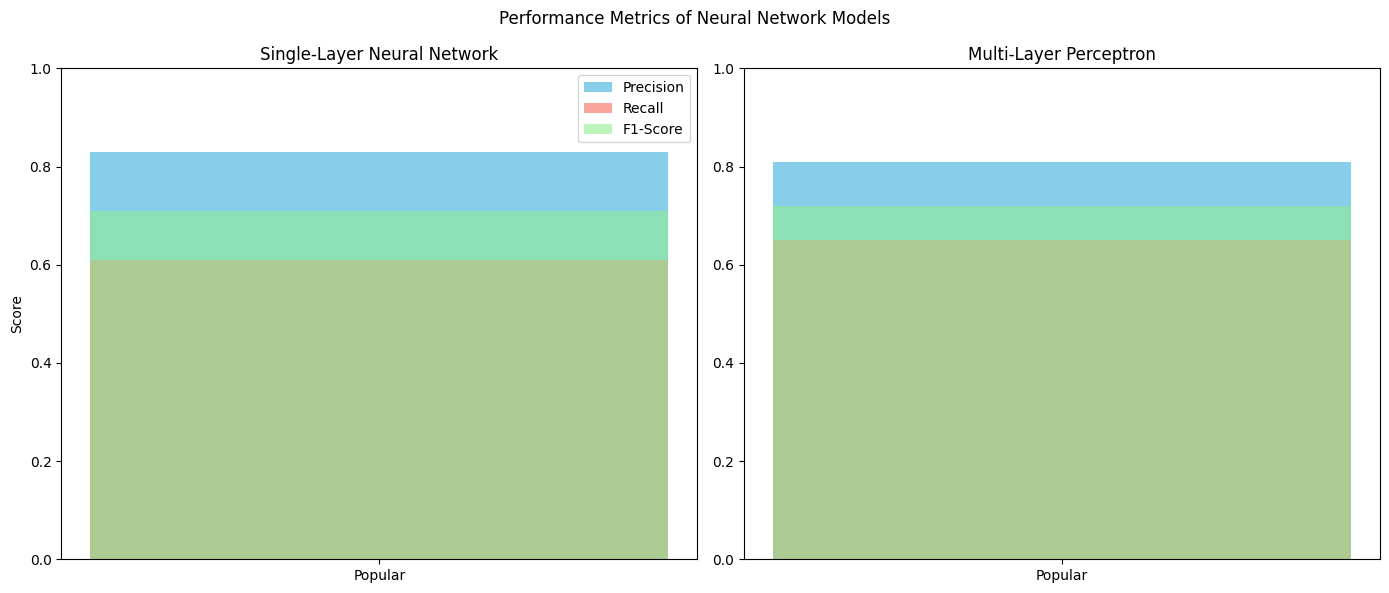

<Figure size 640x480 with 0 Axes>

In [3]:

# Attempting to handle the line parsing with a more flexible approach
def extract_metrics_fixed(report):
    lines = report.strip().split('\n')
    metrics = {'Class': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

    # Parse each line for metrics with more error checking
    for line in lines[2:4]:  # Only "Not Popular" and "Popular" rows
        parts = line.split()

        # Ensure there are enough parts and the parts we need are numeric
        if len(parts) >= 5 and parts[1].replace('.', '', 1).isdigit():
            class_name = parts[0]
            precision = float(parts[1])
            recall = float(parts[2])
            f1 = float(parts[3])

            metrics['Class'].append(class_name)
            metrics['Precision'].append(precision)
            metrics['Recall'].append(recall)
            metrics['F1-Score'].append(f1)

    return metrics


# Parse reports for both models with the fixed function
metrics_single_layer = extract_metrics_fixed(report_single_layer)
metrics_multi_layer = extract_metrics_fixed(report_multi_layer)

# Create subplots for side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Single-Layer NN metrics
axes[0].bar(metrics_single_layer['Class'], metrics_single_layer['Precision'], color='skyblue', label='Precision')
axes[0].bar(metrics_single_layer['Class'], metrics_single_layer['Recall'], color='salmon', alpha=0.7, label='Recall')
axes[0].bar(metrics_single_layer['Class'], metrics_single_layer['F1-Score'], color='lightgreen', alpha=0.6, label='F1-Score')
axes[0].set_title('Single-Layer Neural Network')
axes[0].set_ylim([0, 1])
axes[0].set_ylabel('Score')
axes[0].legend()

# Plot Multi-Layer Perceptron metrics
axes[1].bar(metrics_multi_layer['Class'], metrics_multi_layer['Precision'], color='skyblue', label='Precision')
axes[1].bar(metrics_multi_layer['Class'], metrics_multi_layer['Recall'], color='salmon', alpha=0.7, label='Recall')
axes[1].bar(metrics_multi_layer['Class'], metrics_multi_layer['F1-Score'], color='lightgreen', alpha=0.6, label='F1-Score')
axes[1].set_title('Multi-Layer Perceptron')
axes[1].set_ylim([0, 1])

plt.suptitle('Performance Metrics of Neural Network Models')
plt.tight_layout()
plt.show()


plt.suptitle('Performance Metrics of Neural Network Models')
plt.tight_layout()
plt.show()


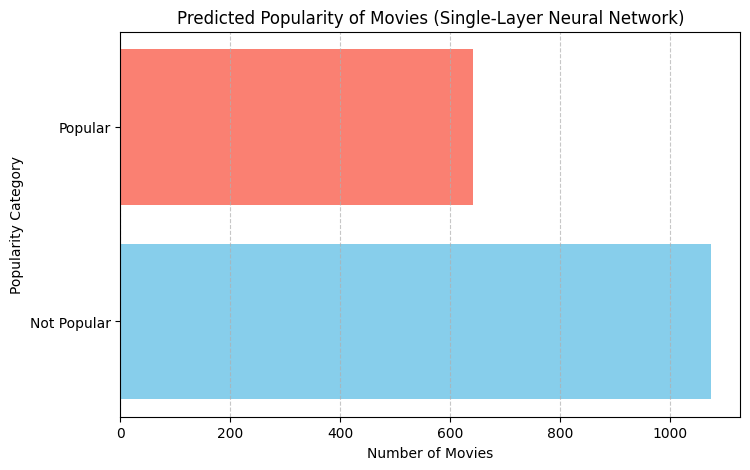

In [4]:
categories = ['Not Popular', 'Popular']

# Count the predictions for each class
counts = np.bincount(single_layer_nn.predict(X_test_scaled), minlength=2)

# Plot a bar graph
plt.figure(figsize=(8, 5))
plt.barh(categories, counts, color=['skyblue', 'salmon'])
plt.title('Predicted Popularity of Movies (Single-Layer Neural Network)')
plt.xlabel('Number of Movies')
plt.ylabel('Popularity Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

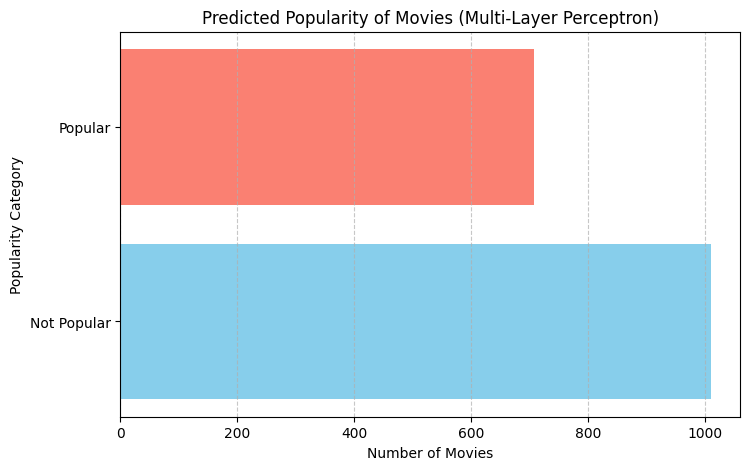

In [5]:
# Count the predicted labels for "Popular" and "Not Popular" from MLP
categories = ['Not Popular', 'Popular']
counts = np.bincount(multi_layer_nn.predict(X_test_scaled), minlength=2)

# Plot a bar graph
plt.figure(figsize=(8, 5))
plt.barh(categories, counts, color=['skyblue', 'salmon'])
plt.title('Predicted Popularity of Movies (Multi-Layer Perceptron)')
plt.xlabel('Number of Movies')
plt.ylabel('Popularity Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [6]:
# Dropping unnecessary columns and handling missing data in 'overview'
if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])
data = data.dropna(subset=['overview'])

# Using TF-IDF to vectorize the 'overview' column
tfidf = TfidfVectorizer(stop_words='english', max_features=10000)
tfidf_matrix = tfidf.fit_transform(data['overview'])

# Calculating cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Mapping indices with movie titles for recommendations
movie_indices = pd.Series(data.index, index=data['title'].str.lower()).drop_duplicates()

def recommend_movies(title, num_recommendations=5):
    """
    Recommend movies based on the similarity of their overviews.
    """
    title = title.lower()
    if title not in movie_indices:
        return f"Movie '{title}' not found in the dataset."

    # Retrieve the index of the selected movie
    idx = movie_indices[title]

    # Get similarity scores and ensure they are in a 1D array
    sim_scores = cosine_sim[idx].flatten()

    # Enumerate and sort by similarity score
    sim_scores = [(i, score) for i, score in enumerate(sim_scores)]
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:num_recommendations+1]

    # Retrieve recommendations safely
    recommendations = []
    for i, score in sim_scores:
        if i < len(data):  # Prevent out-of-bounds
            recommendations.append({
                'title': data.iloc[i]['title'],
                'overview': data.iloc[i]['overview']
            })

    return recommendations




# Testing the recommendation system
recommend_movies(input("Enter a movie title: "))


Enter a movie title: Cowboy Bebop: The Movie


[{'title': 'Midnight Run',
  'overview': 'A bounty hunter pursues a former Mafia accountant who embezzled $15 million of mob money. He is also being chased by a rival bounty hunter, the F.B.I., and his old mob boss after jumping bail.'},
 {'title': 'Domino',
  'overview': 'The story of the life of Domino Harvey, who abandoned her career as a Ford model to become a bounty hunter.'},
 {'title': 'Django Unchained',
  'overview': 'With the help of a German bounty hunter, a freed slave sets out to rescue his wife from a brutal Mississippi plantation owner.'},
 {'title': 'For a Few Dollars More',
  'overview': 'Two bounty hunters are in pursuit of "El Indio," one of the most wanted fugitives in the western territories, and his gang.'},
 {'title': 'The Hateful Eight',
  'overview': 'Bounty hunters seek shelter from a raging blizzard and get caught up in a plot of betrayal and deception.'}]